In [4]:
import numpy as np
import matplotlib.pyplot as plt


C:\Users\Julian\AppData\Local\Temp\ipykernel_9276\3852707266.py:10: RuntimeWarning: divide by zero encountered in divide
  kn_1 = lambda q: C1/((q+Q)*(1-eta))
C:\Users\Julian\AppData\Local\Temp\ipykernel_9276\3852707266.py:11: RuntimeWarning: divide by zero encountered in divide
  kn_2 = lambda q: C2/((q+Q)*(1-eta))
C:\Users\Julian\AppData\Local\Temp\ipykernel_9276\3852707266.py:13: RuntimeWarning: divide by zero encountered in divide
  kp_1 = lambda q: C1/((q-Q)*(1-eta))
C:\Users\Julian\AppData\Local\Temp\ipykernel_9276\3852707266.py:14: RuntimeWarning: divide by zero encountered in divide
  kp_2 = lambda q: C2/((q-Q)*(1-eta))


20.833333333333314 41.66666666666663 -20.833333333333314 -41.66666666666663


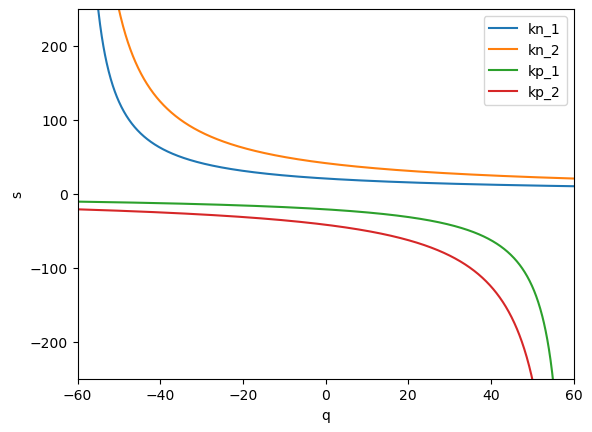

In [58]:
St_arr = np.linspace(-250,250,500)
q_arr = np.linspace(-60,60,1210)

Q = 60

eta = 0.996
C1 = 5
C2 = 10

kn_1 = lambda q: C1/((q+Q)*(1-eta))
kn_2 = lambda q: C2/((q+Q)*(1-eta))

kp_1 = lambda q: C1/((q-Q)*(1-eta))
kp_2 = lambda q: C2/((q-Q)*(1-eta))



fig, ax = plt.subplots()
ax.plot(q_arr, kn_1(q_arr), label='kn_1')
ax.plot(q_arr, kn_2(q_arr), label='kn_2')
ax.plot(q_arr, kp_1(q_arr), label='kp_1')
ax.plot(q_arr, kp_2(q_arr), label='kp_2')
ax.set_xlabel('q')
ax.set_ylabel('s')
ax.set_xlim([-60,60])
ax.set_ylim([-250,250])
ax.legend()

print(kn_1(0), kn_2(0), kp_1(0), kp_2(0))


In [44]:
multipliers = np.array([[24,70,41,21,60],
                        [47,82,87,80,35],
                        [73,89,100,90,17],
                        [77,83,85,79,55],
                        [12,27,52,15,30]])

hunters = np.array([[2,4,3,2,4],
                    [3,5,5,5,3],
                    [4,5,8,7,2],
                    [5,5,5,5,4],
                    [2,3,4,2,3]])

reward = 7.5


dist = 100/25*np.ones((5,5))


In [46]:
def get_reward(multipliers, hunters, reward, dist):
    reward_matrix = np.zeros((5,5))
    reward_matrix = reward*multipliers/(hunters+dist)
    return reward_matrix

print(np.round(get_reward(multipliers, hunters, reward, dist),decimals=1))

[[30.  65.6 43.9 26.2 56.2]
 [50.4 68.3 72.5 66.7 37.5]
 [68.4 74.2 62.5 61.4 21.2]
 [64.2 69.2 70.8 65.8 51.6]
 [15.  28.9 48.8 18.8 32.1]]


In [91]:
print(np.round(get_reward(multipliers, hunters, reward, dist*6/4), decimals = 1))

[[22.5 52.5 34.2 19.7 45. ]
 [39.2 55.9 59.3 54.5 29.2]
 [54.8 60.7 53.6 51.9 15.9]
 [52.5 56.6 58.  53.9 41.2]
 [11.2 22.5 39.  14.1 25. ]]


Others are very stupid
[[72.7 58.1 64.3 68.2 57.7]
 [65.7 52.6 52.6 52.6 61.6]
 [58.  52.5 43.  45.4 59.9]
 [52.6 52.6 52.6 52.6 57.1]
 [45.  55.3 56.6 54.6 58.1]]
Others choose randomly
[[30.  65.6 43.9 26.2 56.2]
 [50.4 68.3 72.5 66.7 37.5]
 [68.4 74.2 62.5 61.4 21.2]
 [64.2 69.2 70.8 65.8 51.6]
 [15.  28.9 48.8 18.8 32.1]]
Others choose based on the assumption that the percentages are evenly distributed:
[[60.5 52.3 54.8 59.8 53.3]
 [54.  53.3 53.  53.4 54.8]
 [51.9 52.9 55.6 54.9 56.4]
 [53.6 53.3 53.2 53.5 53.5]
 [45.  52.3 53.5 53.  53.7]]
Others choose based on the assumprion that people choose according to proportions of very stupid, random and even assumption:
[[16.4 76.1 40.9 15.2 59.9]
 [50.5 72.  78.4 69.7 34.9]
 [82.2 81.1 57.4 58.3 16.7]
 [66.5 73.2 75.7 68.6 53.9]
 [45.  34.3 51.  21.1 33.2]]


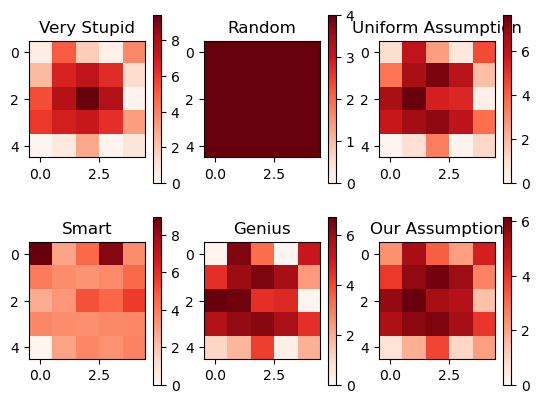

[[31. 61. 49. 29. 56.]
 [54. 59. 61. 59. 45.]
 [62. 61. 54. 55. 29.]
 [58. 60. 60. 59. 54.]
 [39. 42. 53. 32. 43.]]
[[42. 56. 49. 39. 53.]
 [51. 58. 59. 57. 47.]
 [57. 60. 56. 56. 37.]
 [57. 58. 59. 57. 52.]
 [34. 42. 51. 38. 44.]]


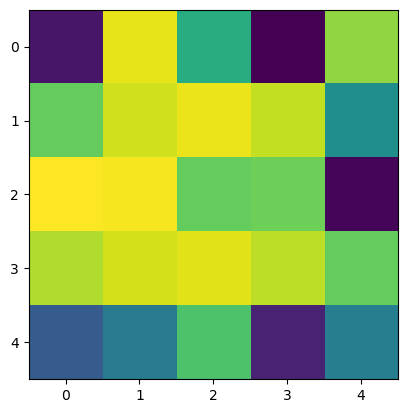

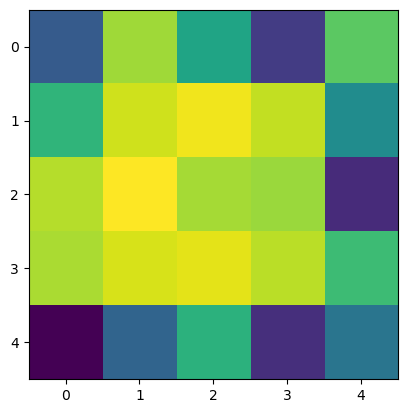

In [50]:
proportion_very_stupid = 0.1 #chooses the highest multipliers
proportion_random = 0.05 #chooses randomly
proportion_uniform_assum = 0.25 #chooses the highest reward assuming uniform distribution
proportion_smart = 0.2 #chooses the highest reward assmuming other people choose based on a uniform distribution
proportion_genius = 0.4 # Chooses bases on the assumption that other people choose according to the above proportions

def reward_to_dist(reward):
    scaled_rewards = reward.copy() - np.min(reward)
    return scaled_rewards**1.5/np.sum(scaled_rewards**1.5)*100

dist_very_stupid = reward_to_dist(multipliers)
#print(dist_very_stupid)
dist_random = dist.copy()
#print(dist_random)
dist_uniform_assum = reward_to_dist(get_reward(multipliers, hunters, reward, dist))
#print(dist_uniform_assum)
dist_smart = reward_to_dist(get_reward(multipliers, hunters, reward, dist_uniform_assum))
#print(dist_smart)

print("Others are very stupid")
print(np.round(get_reward(multipliers, hunters, reward, dist_very_stupid), decimals=1))
print("Others choose randomly")
print(np.round(get_reward(multipliers, hunters, reward, dist_random), decimals=1))
print("Others choose based on the assumption that the percentages are evenly distributed:")
print(np.round(get_reward(multipliers, hunters, reward, dist_uniform_assum), decimals=1))
print("Others choose based on the assumprion that people choose according to proportions of very stupid, random and even assumption:")
print(np.round(get_reward(multipliers, hunters, reward, dist_smart), decimals=1))


asumption_of_genius = (proportion_very_stupid*dist_very_stupid 
                       + proportion_random*dist_random
                       + proportion_uniform_assum*dist_uniform_assum 
                       + proportion_smart*dist_smart)/(proportion_very_stupid + proportion_random + proportion_uniform_assum + proportion_smart)
reward_genius = get_reward(multipliers, hunters, reward, asumption_of_genius)
dist_genius = reward_to_dist(reward_genius)

our_assumption = (proportion_very_stupid*dist_very_stupid
                  + proportion_random*dist_random
                  + proportion_uniform_assum*dist_uniform_assum
                  + proportion_smart*dist_smart
                  + proportion_genius*dist_genius)/(proportion_very_stupid + proportion_random + proportion_uniform_assum + proportion_smart + proportion_genius)
our_reward = get_reward(multipliers, hunters, reward, our_assumption)

#plot all the distributions with the Reds colormap starting at 0
fig, ax = plt.subplots(2,3)

fig.colorbar(ax[0,0].imshow(dist_very_stupid, cmap='Reds', vmin=0), ax=ax[0,0])
fig.colorbar(ax[0,1].imshow(dist_random, cmap='Reds', vmin=0), ax=ax[0,1])
fig.colorbar(ax[0,2].imshow(dist_uniform_assum, cmap='Reds', vmin=0), ax=ax[0,2])
fig.colorbar(ax[1,0].imshow(dist_smart, cmap='Reds', vmin=0), ax=ax[1,0])
fig.colorbar(ax[1,1].imshow(dist_genius, cmap='Reds', vmin=0), ax=ax[1,1])
fig.colorbar(ax[1,2].imshow(our_assumption, cmap='Reds', vmin=0), ax=ax[1,2])


ax[0,0].set_title('Very Stupid')
ax[0,1].set_title('Random')
ax[0,2].set_title('Uniform Assumption')
ax[1,0].set_title('Smart')
ax[1,1].set_title('Genius')
ax[1,2].set_title('Our Assumption')
plt.show()


#add colorbars

#plot the genius reward
plt.figure()
plt.imshow(reward_genius)

#plot our reward
plt.figure()
plt.imshow(our_reward)

print(np.round(reward_genius, decimals=0))
print(np.round(our_reward, decimals=0))

